In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import zipfile


zip_file_path = "C:\\Users\\palay\\OneDrive\\Desktop\\react\\comment_analyzer\\resume_dataset.zip"


with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
   
    file_list = zip_ref.namelist()
    print("Files in the ZIP:", file_list)
    
  
    zip_ref.extractall("extracted_files")  
    print("Files extracted to 'extracted_files'")
    
    
    with zip_ref.open(file_list[0]) as file:
        content = file.read().decode('utf-8')  
        print(f"Content of {file_list[0]}:")
        print(content)


Files in the ZIP: ['UpdatedResumeDataSet.csv']
Files extracted to 'extracted_files'
Content of UpdatedResumeDataSet.csv:
Category,Resume
Data Science,"Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details 

Data Science Assurance Associate 

Data Science Assurance Associate - Ernst & Young LLP
Skill Details 
JAVASCRIPT- Exprience - 24 months
jQuery- Exprienc

In [11]:

df = pd.read_csv('extracted_files/UpdatedResumeDataSet.csv')


In [12]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [13]:
df.shape

(962, 2)

In [14]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

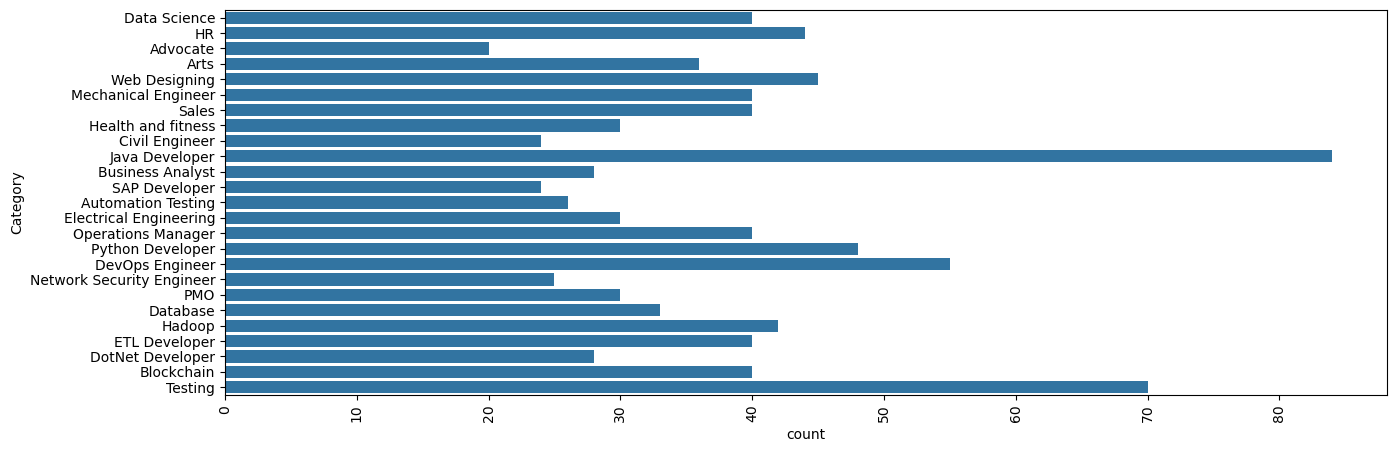

In [15]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.xticks(rotation=90)
plt.show()

In [16]:

df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

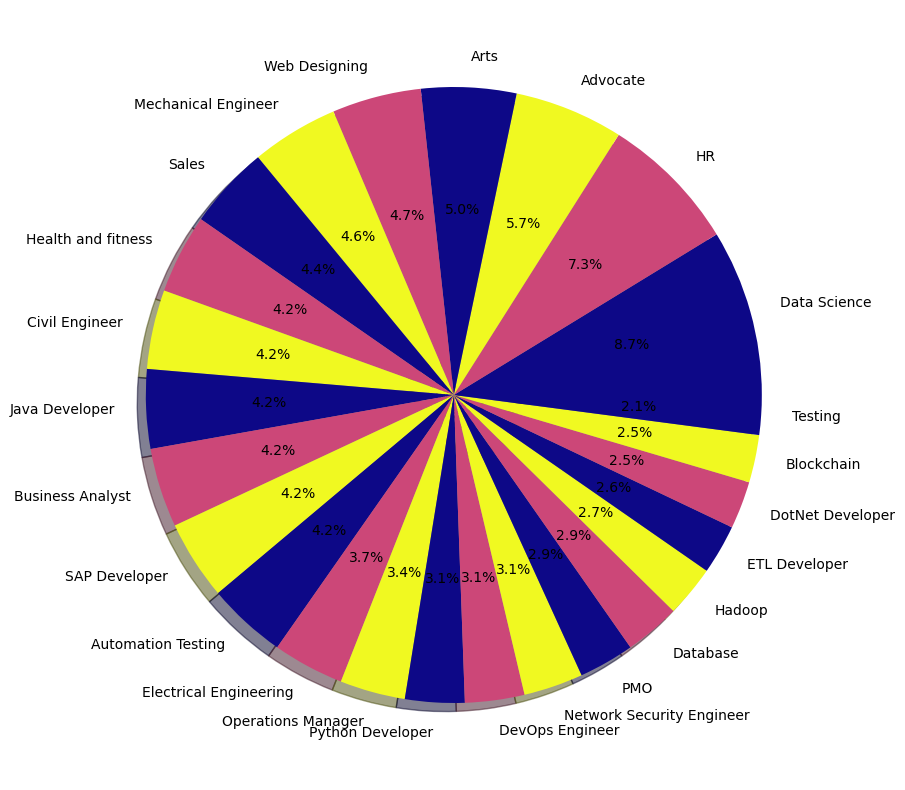

In [17]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(15,10))

plt.pie(counts,labels=labels,autopct='%1.1f%%',shadow=True, colors=plt.cm.plasma(np.linspace(0,1,3)))
plt.show()

In [18]:

df['Category'][0]

'Data Science'

In [19]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

In [20]:


from sklearn.utils import resample


max_count =df['Category'].value_counts().max()


balanced_data = []
for category in df['Category'].unique():
    category_data = df[df['Category'] == category]
    if len(category_data) < max_count:
  
        balanced_category_data = resample(category_data, replace=True, n_samples=max_count, random_state=42)
    else:
       
        balanced_category_data = resample(category_data, replace=False, n_samples=max_count, random_state=42)
    balanced_data.append(balanced_category_data)


balanced_df = pd.concat(balanced_data)

In [21]:

balanced_df.dropna(inplace=True)

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = balanced_df['Resume']
y = balanced_df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [25]:

tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)  # FITTING the vectorizer here!

with open("tfidf_vectorizer_categorization.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("TF-IDF Vectorizer trained and saved successfully!")


TF-IDF Vectorizer trained and saved successfully!


In [26]:
X_train_tfidf

<1680x7552 sparse matrix of type '<class 'numpy.float64'>'
	with 343468 stored elements in Compressed Sparse Row format>

In [27]:
X_test_tfidf = tfidf_vectorizer.transform(X_test)

Accuracy: 1.0
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00        20
                     Arts       1.00      1.00      1.00        19
       Automation Testing       1.00      1.00      1.00        17
               Blockchain       1.00      1.00      1.00        18
         Business Analyst       1.00      1.00      1.00        16
           Civil Engineer       1.00      1.00      1.00        11
             Data Science       1.00      1.00      1.00        20
                 Database       1.00      1.00      1.00        13
          DevOps Engineer       1.00      1.00      1.00        22
         DotNet Developer       1.00      1.00      1.00        13
            ETL Developer       1.00      1.00      1.00        15
   Electrical Engineering       1.00      1.00      1.00        12
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00 

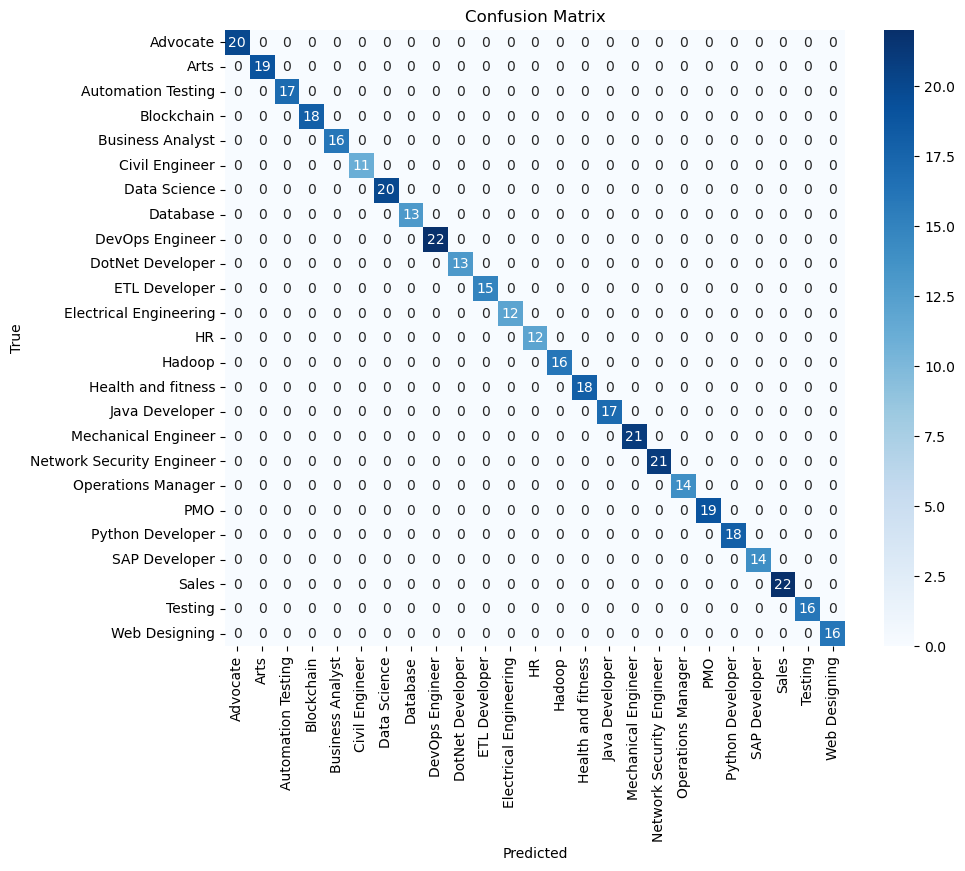

In [28]:

from sklearn.metrics import classification_report

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train_tfidf, y_train)


y_pred = rf_classifier.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test,y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf_classifier.classes_, yticklabels=rf_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [29]:

import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)  
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText) 
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText


# Prediction and Category Name
def predict_category(resume_text):
    resume_text= cleanResume(resume_text)
    resume_tfidf = tfidf_vectorizer.transform([resume_text])
    predicted_category = rf_classifier.predict(resume_tfidf)[0]
    return predicted_category

<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\S'
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:6: SyntaxWarning: invalid escape sequence '\S'
<>:7: SyntaxWarning: invalid escape sequence '\]'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\palay\AppData\Local\Temp\ipykernel_23248\3925281396.py:3: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('http\S+\s', ' ', txt)
C:\Users\palay\AppData\Local\Temp\ipykernel_23248\3925281396.py:5: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('#\S+\s', ' ', cleanText)
C:\Users\palay\AppData\Local\Temp\ipykernel_23248\3925281396.py:6: SyntaxWarning: invalid escape sequence '\S'
  cleanText = re.sub('@\S+', '  ', cleanText)
C:\Users\palay\AppData\Local\T

In [30]:

resume_file='information technology manager network engineer professional overview highly skilled accomplished information technology manager years expertise planning implementing streamlining systems ensure maximum customer satisfaction business revenue strong leader demonstrated ability work effectively individuals levels functional areas exceptional communication project management skills ability successfully manage multiple priorities assignments skills platforms windows server professional windows xp pro home win dos citrix ica ms exchange hardware hp ibm dell intel based server desktop platforms cisco switches sonic wall hardware vpns hp laser jets toshiba e color copier toshiba sony laptops inter tel software ms office visio citrix metaframe xp symantec pc anywhere ghost antivirus utilities win fax mcafee virus scan adobe acrobat illustrator photoshop partition magic adware spyware networking tcp ip wireless b g dns wins dhcp relevant experience information technology manager network engineer feb current company name city state responsible day day operations functions wilkes six offices staff members currently lead team professionals developers planning upgrades implementation systems business applications development new software tools work closely cio senior management ensure business technology objectives aligned researched new technologies calculated future needs achieve accurate capacity planning negotiated hardware software purchases maintenance contracts dramatically reduced costs maintenance virtualizing company infrastructure using vmware reduced physical servers streamlined disaster recovery processes planned executed active directory domain migration r coordinated planning migration mpls network sites including upgrades routers switches network equipment increased speed reliability company email migrating microsoft exchange streamlined operations designing new citrix infrastructure using netscaler load balancers ensure better speed connectivity less downtime remote offices led planning implementation disaster recovery site atlanta created company first comprehensive business continuity plan tested success installed configuring barracuda spam virus firewalls resulting reduction spam enforced security policies managed monitored updated spam filtering virus malware prevention systems reduced desktop application deployment times designing implementing microsoft system center configuration manager conducted training internal systems local procedures technical subjects company employees coordinate external technology vendors internal staff members third party consultants network engineer sep jan company name city state administered managed windows server network environment responsible lan wan duties local remote networks acted technical consultant clients various projects provide end user support windows xp operating systems installed implemented exchange mail server implemented server desktop security using mcafee enterprise epolicy orchestrator installed configured web servers ftp servers pop mail servers manage cisco switches routers configured vpn remote access users implemented software domain policies patches upgrades using group policy sus trained new employees systems administration web development network support technician jan aug company name city provided network desktop support users provided technical support offices b domain supported help desk using help star software troubleshooting windows desktop computers implemented group policy objects control desktop environment security performed hardware software upgrades replacements performed installations troubleshooting ms office suite managed users computers organizational units active directory created disc images desktop notebook computers using norton ghost troubleshooting repairs laser printers copy machines education bachelor science management information systems university maryland university college city state certifications microsoft certified technology specialist mcts citrix certified administrator cca information systems management certificate project management certificate'

predicted_category = predict_category(resume_file)
print("Predicted Category:", predicted_category)

Predicted Category: Network Security Engineer


In [31]:

import pickle
pickle.dump(rf_classifier,open('C:\\Users\\palay\\OneDrive\\Desktop\\react\\comment_analyzer\\rf_classifier_categorization.pkl','wb'))
pickle.dump(tfidf_vectorizer,open('C:\\Users\\palay\\OneDrive\\Desktop\\react\\comment_analyzer\\tfidf_vectorizer_categorization.pkl','wb'))

In [32]:
!pip install mlflow


In [33]:
import mlflow

In [34]:
from sklearn.metrics import classification_report

In [46]:
report=classification_report(y_test,y_pred,output_dict=True)

In [47]:
print(report)

{'Advocate': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Arts': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 19.0}, 'Automation Testing': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17.0}, 'Blockchain': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 18.0}, 'Business Analyst': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 16.0}, 'Civil Engineer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11.0}, 'Data Science': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 20.0}, 'Database': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, 'DevOps Engineer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22.0}, 'DotNet Developer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 13.0}, 'ETL Developer': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 15.0}, 'Electrical Engineering': {'precision': 1.0, 'recall': 1.0, 'f

In [37]:
import mlflow

mlflow.set_tracking_uri("http://127.0.0.1:5000")  # Change if using a remote server
mlflow.set_experiment("my_experiment")

with mlflow.start_run():
    mlflow.log_param("param1", 10)
    mlflow.log_metric("accuracy", 0.95)


🏃 View run skillful-mule-868 at: http://127.0.0.1:5000/#/experiments/563250904817985504/runs/d05f69b9e31049aa9a219312474f1bd5
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/563250904817985504


In [41]:
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
import pickle

model = RandomForestClassifier()
model.fit(X_train_tfidf, y_train)

# Save the model using MLflow
mlflow.sklearn.log_model(rf_classifier, "random_forest_model")


2025/02/08 14:54:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [43]:
import mlflow
import mlflow.sklearn
 
mlflow.set_experiment("Resume_k")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")



In [48]:
with mlflow.start_run(nested=True):
    mlflow.log_params({})  # No parameters, logging empty dict

    for class_name, metrics in report.items():
        if class_name not in ["accuracy", "macro avg", "weighted avg"]:
            for metric_name, value in metrics.items():
                metric_key = f"{class_name}_{metric_name}"
                mlflow.log_metric(metric_key, value)

    mlflow.log_metric("accuracy", report["accuracy"])

    # Log the trained model
    mlflow.sklearn.log_model(rf_classifier, "RandomForest_Model")

print("Model and metrics logged successfully!")

2025/02/08 14:56:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run casual-carp-618 at: http://127.0.0.1:5000/#/experiments/171505290865015573/runs/b987c598e89d4a3caae9a19bd7b2bfef
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/171505290865015573
Model and metrics logged successfully!


In [50]:
mlflow.log_artifact("resume.ipynb")


In [45]:
from sklearn.metrics import classification_report

report = classification_report(y_true, y_pred, output_dict=True)


NameError: name 'y_true' is not defined

In [ ]:

with mlflow.start_run(nested=True):
    # Log Accuracy
    mlflow.log_metric("accuracy", accuracy)

    # Log Classification Report Metrics
    for class_name, metrics in report.items():
        if class_name not in ["accuracy", "macro avg", "weighted avg"]:
            for metric_name, value in metrics.items():
                metric_key = f"{class_name}_{metric_name}"
                mlflow.log_metric(metric_key, value)

    # Log Confusion Matrix as Image
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
                xticklabels=rf_classifier.classes_, 
                yticklabels=rf_classifier.classes_)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")

    # Save Confusion Matrix
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")  # Log image to MLflow
    plt.close()

    # Log Trained Model
    mlflow.sklearn.log_model(rf_classifier, "RandomForest_Model")

# End MLflow run
mlflow.end_run()

print("Model, metrics, and confusion matrix logged successfully in MLflow!")


MlflowException: API request to http://127.0.0.1:5000/api/2.0/mlflow/runs/create failed with exception HTTPConnectionPool(host='127.0.0.1', port=5000): Max retries exceeded with url: /api/2.0/mlflow/runs/create (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x000002634A775850>: Failed to establish a new connection: [WinError 10061] No connection could be made because the target machine actively refused it'))